 # Correlation
Correlation quantifies how strong and in which direction the two variables are related. It is being measured using the correlation coefficient which goes to the extent of negative one and positive one.

### Pearson Correlation Coefficient
It measures a linear dependence between two variables (x and y) is known as a parametric correlation test because it depends on the distribution of the data.

### Spearman Correlation Coefficient
The Spearman correlation coefficient is a non-parametric measure of correlation that assesses monotonic relationships (relationships that are always increasing or always decreasing but not necessarily linear). It is based on the ranked values of the data rather than their raw values, making it suitable for non-linear relationships and ordinal data.


In [19]:
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [20]:
data = sns.load_dataset("iris")

pearson_corr, _ = pearsonr(data["sepal_length"], data["sepal_width"])
spearman_corr, _ = spearmanr(data["sepal_length"], data["sepal_width"])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")

Pearson Correlation: -0.118
Spearman Correlation: -0.167


#  Interpreting Correlation 
### Strength
The absolute value of the coefficient indicates the strength of the relationship: 
 
Strong:A correlation coefficient close to ±1 indicates a strong relationship. For example, a correlation of 0.9 indicates a very strong positive correlation. 
 
Weak:A correlation coefficient closer to 0 indicates a weak relationship. For example, a correlation of -0.1 indicates a weak negative correlation.

## Direction
The sign of the coefficient indicates the direction of the relationship: 

Positive: A positive coefficient means that the variables change in the same direction. For example, height and shoe size have a positive correlation. 
 
Negative: A negative coefficient means that the variables change in opposite directions. For example, product price and sales quantity have a negative correlation. 
 

# Correlation
Correlation refers to a statistical association between two variables. When two variables are correlated, changes in one variable are associated with changes in the other, but this association does not imply that one variable influences or causes the other to change. Correlation only describes the strength and direction of a relationship:

Positive Correlation: As one variable increases, the other also tends to increase.
Negative Correlation: As one variable increases, the other tends to decrease.
No Correlation: No consistent relationship is observed between the two variables.


# Causation
Causation, on the other hand, implies a cause-and-effect relationship. If one variable is causing changes in another, then manipulating the first variable would lead to predictable changes in the second. Establishing causation is much harder than establishing correlation and often requires controlled experiments or longitudinal studies to rule out confounding factors.



## Linear Regression

Linear regression is a type of supervised machine learning algorithm that computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation to observed data.

When there is only one independent feature, it is known as Simple Linear Regression, and when there are more than one feature, it is known as Multiple Linear Regression.

Similarly, when there is only one dependent variable, it is considered Univariate Linear Regression, while when there are more than one dependent variables, it is known as Multivariate Regression.

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


Text(0, 0.5, 'Tip')

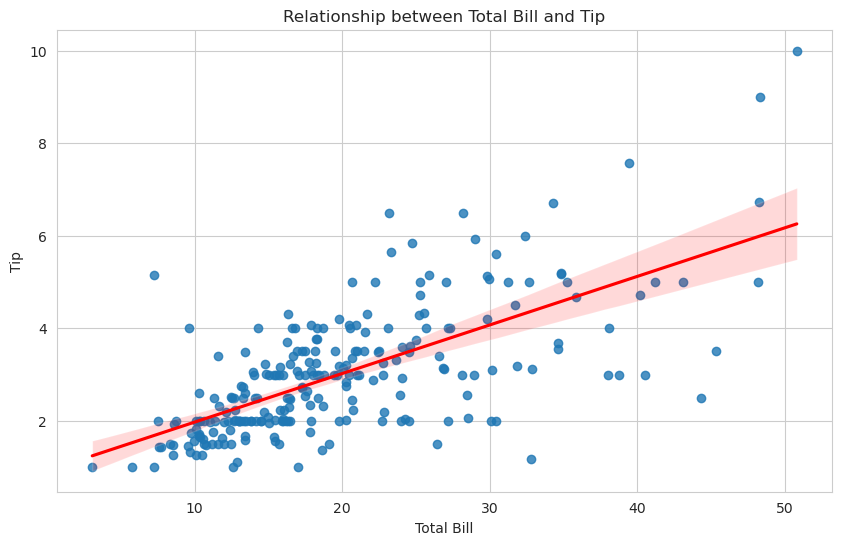

In [40]:
tips = sns.load_dataset("tips")
print(tips.head())
X = tips[["total_bill"]]  
y = tips["tip"]    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.regplot(x="total_bill", y="tip", data=tips, line_kws={"color": "red"})
plt.title("Relationship between Total Bill and Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")


# Line of Best Fit
The line of best fit, also known as a trend line or linear regression line, is a straight line that is used to approximate the relationship between two variables in a set of data points on a scatter plot. This line attempts to show the pattern within the data by minimizing the total distance between itself and all the data points.

## Regression Equation 
It is a supervised machine learning technique, used to predict the value of the dependent variable for new, unseen data. It models the relationship between the input features and the target variable, allowing for the estimation or prediction of numerical values.

# R-squared

R-squared, also known as the coefficient of determination, is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by one or more independent variables in a regression model. In simpler terms, it shows how well the data fit a regression line or curve.
R2 = 1 – (RSS/TSS)

R2 represents the requrired R Squared value,
RSS represents the residual sum of squares, and
TSS represents the total sum of squares.

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2:.2f}")


R-squared Score: 0.54


# Residuals
esiduals in a statistical or machine learning model are the differences between observed and predicted values of data. They are a diagnostic measure used when assessing the quality of a model. They are also known as errors.

Text(0.5, 1.0, 'Residual Plot: Total Bill vs Residuals')

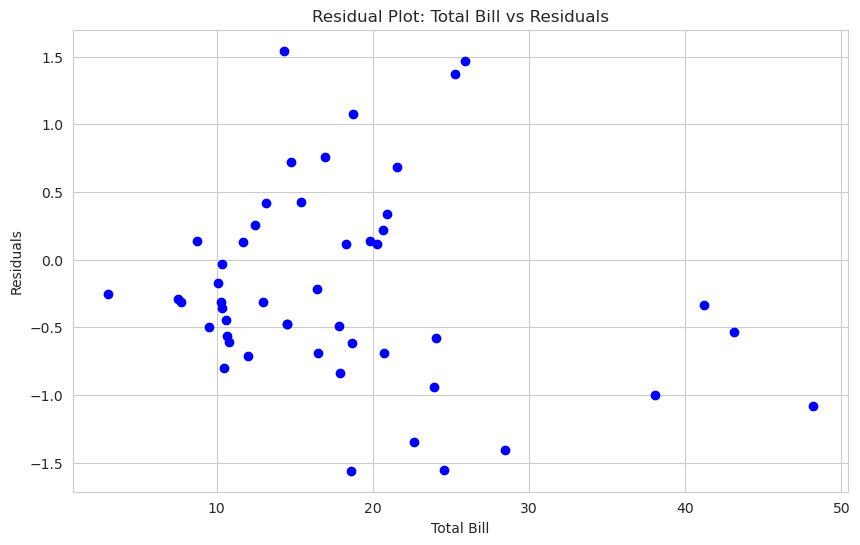

In [50]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color="blue", label="Residuals")
plt.xlabel("Total Bill")
plt.ylabel("Residuals")
plt.title("Residual Plot: Total Bill vs Residuals")



## Multiple linear regression 
(MLR) is a statistical technique that uses multiple independent variables to predict a dependent variable

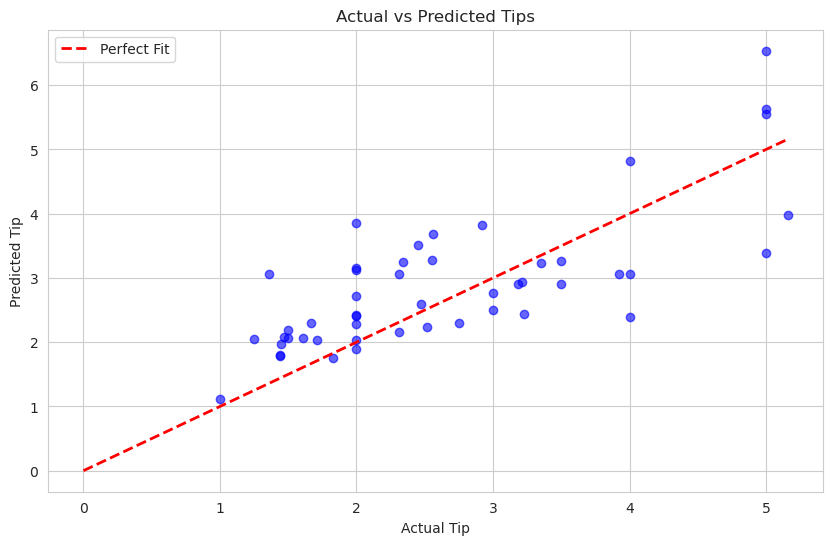

In [55]:
X = tips[["total_bill", "size"]]  
y = tips["tip"]                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Tip")
plt.ylabel("Predicted Tip")
plt.title("Actual vs Predicted Tips")
plt.legend()
plt.show()


